Computes the time tendency of eddy kinetic energy as the target feature.

In [8]:
import xarray as xr
import cmocean

In [4]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/coarsened_data/'
fn = 'MINT_1d_0061-0072_eke_c_SO_JET.nc'

In [5]:
ds = xr.open_dataset(directory+fn)
ds

<xarray.Dataset> Size: 112MB
Dimensions:  (t: 4320, y_c: 54, x_c: 60)
Coordinates:
  * t        (t) object 35kB 0061-01-02 00:00:00 ... 0073-01-01 00:00:00
    gphit    (y_c, x_c) float64 26kB ...
    glamt    (y_c, x_c) float64 26kB ...
Dimensions without coordinates: y_c, x_c
Data variables:
    eke      (t, y_c, x_c) float64 112MB ...
Attributes:
    description:  DINO EXP16 regridded to EXP4 -> ocean T grid variables

Compute the eke tendency

In [10]:
dt = 86400 # seconds in a day
eke_tendency_rate = ds['eke'].diff(dim='t') / dt

In [11]:
eke_tendency_rate

<xarray.DataArray 'eke' (t: 4319, y_c: 54, x_c: 60)> Size: 112MB
array([[[ 2.60118881e-08,  5.88274042e-09,  1.75332917e-09, ...,
          5.04707265e-08,  5.39293914e-08,  2.55788211e-08],
        [ 5.19557715e-08, -3.54369667e-09, -3.30586118e-09, ...,
          1.06397330e-09,  3.52189428e-08,  3.44915300e-08],
        [ 3.40571542e-08, -1.87284303e-08, -2.85072604e-08, ...,
         -8.26067668e-08, -1.68009995e-08,  1.82085527e-08],
        ...,
        [ 1.70824733e-08,  1.63685335e-08,  1.23553562e-08, ...,
          6.00610545e-09,  1.07182870e-08,  7.15701838e-09],
        [ 3.16733519e-08,  2.40863392e-08,  1.42524253e-08, ...,
          2.33350838e-08,  3.10485489e-08,  1.66832495e-08],
        [ 3.49338895e-08,  2.38412480e-08,  1.26230478e-08, ...,
          4.12706546e-08,  4.58341101e-08,  2.14386706e-08]],

       [[-1.34981243e-08,  1.19415568e-08,  9.26155310e-09, ...,
          5.85576671e-09,  5.24070535e-09, -2.28916720e-09],
        [-1.13675804e-09, -9.64001281e-09, -9.25524443e-09, ...,
          2.87239151e-08,  3.23694121e-08,  1.40781214e-08],
        [ 4.21104161e-08, -6.56414832e-09, -2.83306814e-08, ...,
         -5.95122583e-08, -1.50211280e-08,  1.82321124e-08],
...
         -7.39963053e-09, -9.41852743e-10,  5.04860496e-09],
        [ 4.08429253e-08,  6.31380350e-08,  6.10628625e-08, ...,
         -1.70983456e-08, -6.21000777e-09,  8.09928809e-09],
        [ 7.32696768e-08,  8.38216490e-08,  6.20294015e-08, ...,
         -3.84140770e-08, -1.43842889e-08,  1.45261411e-08]],

       [[ 1.20521500e-07,  1.57512243e-07,  5.76473231e-08, ...,
          6.21416268e-08, -1.23749061e-08,  1.45964887e-08],
        [ 7.38988473e-08,  5.00666327e-08,  1.76096385e-08, ...,
          3.06258647e-08, -3.25099448e-08,  2.09260757e-08],
        [ 4.60771443e-08,  4.67341289e-09,  9.35365742e-09, ...,
         -4.89425479e-08, -7.21569356e-08,  8.66511963e-09],
        ...,
        [ 2.56211300e-08,  4.54421446e-08,  4.16253506e-08, ...,
          3.43374633e-08,  9.90409626e-09,  5.72469434e-09],
        [ 3.68119093e-08,  5.58833885e-08,  4.14045037e-08, ...,
          7.13457427e-08,  2.07091062e-08,  9.56084681e-09],
        [ 5.97439417e-08,  8.46812763e-08,  4.57076980e-08, ...,
          9.67336539e-08,  1.93262909e-08,  1.10578604e-08]]],
      shape=(4319, 54, 60))
Coordinates:
  * t        (t) object 35kB 0061-01-03 00:00:00 ... 0073-01-01 00:00:00
    gphit    (y_c, x_c) float64 26kB ...
    glamt    (y_c, x_c) float64 26kB ...
Dimensions without coordinates: y_c, x_c

In [18]:
eke_tendency_rate.to_dataset(name='eke_tendency').to_netcdf(directory+'MINT_1d_0061-0072_eke_tendency_c_SO_JET.nc')

In [17]:
eke_tendency_rate.t

<xarray.DataArray 't' (t: 4319)> Size: 35kB
array([cftime.Datetime360Day(61, 1, 3, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(61, 1, 4, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(61, 1, 5, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(72, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(72, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(73, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      shape=(4319,), dtype=object)
Coordinates:
  * t        (t) object 35kB 0061-01-03 00:00:00 ... 0073-01-01 00:00:00

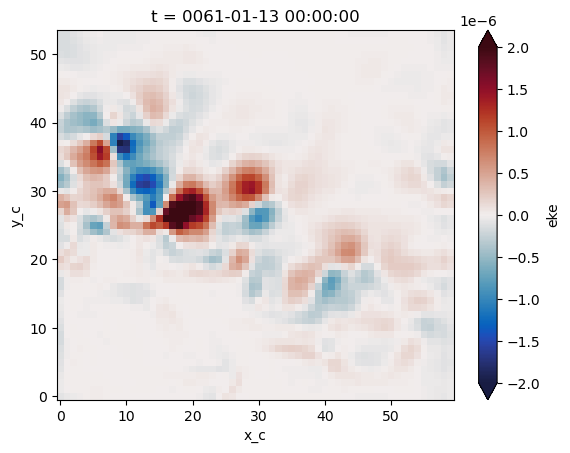

In [16]:
eke_tendency_rate.isel(t=10).plot(vmin=-2e-6, vmax=2e-6,
                                           cmap=cmocean.cm.balance)